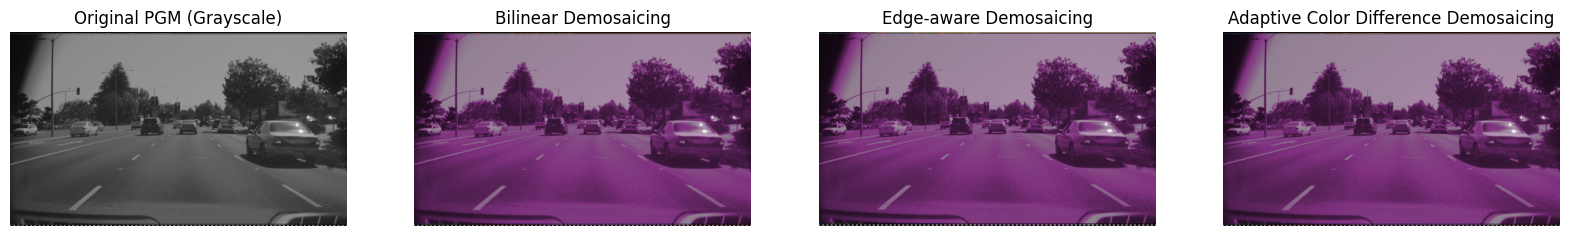

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the PGM image
pgm_path = "/content/56988.pgm"
png_path = "/content/56988.png"
pgm_image = cv2.imread(pgm_path, cv2.IMREAD_UNCHANGED)  # Load as grayscale

# Ensure the image is valid
if pgm_image is None:
    raise ValueError("Error loading the PGM image.")

# Convert to 8-bit if necessary
if pgm_image.dtype != np.uint8:
    pgm_image = cv2.normalize(pgm_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Define a function for demosaicing
def demosaic_rccb(image, method):
    return cv2.demosaicing(image, method)

# Apply different demosaicing algorithms
demosaiced_bilinear = demosaic_rccb(pgm_image, cv2.COLOR_BayerBG2BGR)  # Bilinear
demosaiced_vng = demosaic_rccb(pgm_image, cv2.COLOR_BayerBG2BGR_VNG)  # Edge-aware
demosaiced_ea = demosaic_rccb(pgm_image, cv2.COLOR_BayerBG2BGR_EA)  # Adaptive color difference

# Load reference PNG image
png_image = cv2.imread(png_path)
if png_image is None:
    raise ValueError("Error loading the PNG image.")

png_image = cv2.cvtColor(png_image, cv2.COLOR_BGR2RGB)

# Display the images
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.title("Original PGM (Grayscale)")
plt.imshow(pgm_image, cmap='gray')
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("Bilinear Demosaicing")
plt.imshow(cv2.cvtColor(demosaiced_bilinear, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 4, 3)
plt.title("Edge-aware Demosaicing")
plt.imshow(cv2.cvtColor(demosaiced_vng, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 4, 4)
plt.title("Adaptive Color Difference Demosaicing")
plt.imshow(cv2.cvtColor(demosaiced_ea, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.show()

# Save the images
cv2.imwrite("/content/demosaiced_bilinear.png", demosaiced_bilinear)
cv2.imwrite("/content/demosaiced_vng.png", demosaiced_vng)
cv2.imwrite("/content/demosaiced_ea.png", demosaiced_ea)


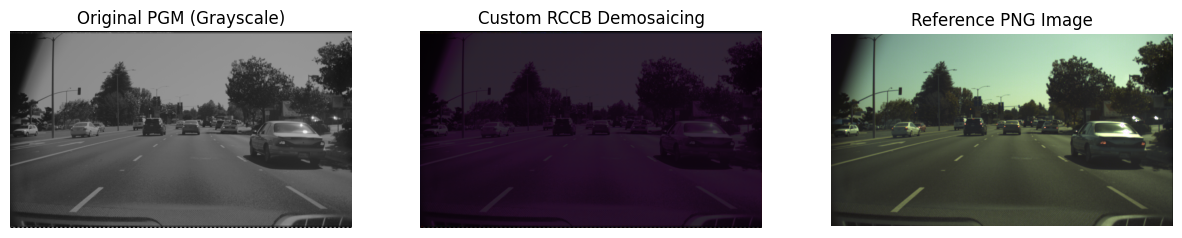

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the PGM image
pgm_path = "/content/56988.pgm"
png_path = "/content/56988.png"
pgm_image = cv2.imread(pgm_path, cv2.IMREAD_UNCHANGED)  # Load as grayscale

# Ensure image is valid
if pgm_image is None:
    raise ValueError("Error loading the PGM image.")

# Convert to 8-bit if necessary
if pgm_image.dtype != np.uint8:
    pgm_image = cv2.normalize(pgm_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Custom RCCB demosaicing function
def demosaic_rccb(image):
    h, w = image.shape

    # Extract RCCB channels
    R = np.zeros((h, w), dtype=np.uint8)
    C1 = np.zeros((h, w), dtype=np.uint8)  # First clear channel
    C2 = np.zeros((h, w), dtype=np.uint8)  # Second clear channel
    B = np.zeros((h, w), dtype=np.uint8)

    # Assign values based on assumed RCCB Bayer pattern
    R[0::2, 0::2] = image[0::2, 0::2]  # Red
    C1[0::2, 1::2] = image[0::2, 1::2]  # Clear
    C2[1::2, 0::2] = image[1::2, 0::2]  # Clear
    B[1::2, 1::2] = image[1::2, 1::2]  # Blue

    # Estimate Green using the average of both clear channels
    G = ((C1 + C2) / 2).astype(np.uint8)

    # Merge into a 3-channel image
    demosaiced = cv2.merge([B, G, R])

    # Apply color correction to match natural RGB
    CCM = np.array([
        [1.2, -0.2, 0],   # Red correction
        [-0.1, 1.1, -0.1],  # Green correction
        [0, -0.2, 1.3]    # Blue correction
    ])

    corrected = cv2.transform(demosaiced.astype(np.float32) / 255.0, CCM)
    corrected = np.clip(corrected * 255, 0, 255).astype(np.uint8)

    return corrected

# Apply custom RCCB demosaicing
demosaiced_rccb = demosaic_rccb(pgm_image)

# Load reference PNG image
png_image = cv2.imread(png_path)
if png_image is None:
    raise ValueError("Error loading the PNG image.")

png_image = cv2.cvtColor(png_image, cv2.COLOR_BGR2RGB)

# Display the images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original PGM (Grayscale)")
plt.imshow(pgm_image, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Custom RCCB Demosaicing")
plt.imshow(demosaiced_rccb)
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Reference PNG Image")
plt.imshow(png_image)
plt.axis("off")

plt.show()

# Save the demosaiced image
cv2.imwrite("/content/demosaiced_rccb.png", demosaiced_rccb)


Changing the values of color correction matrix

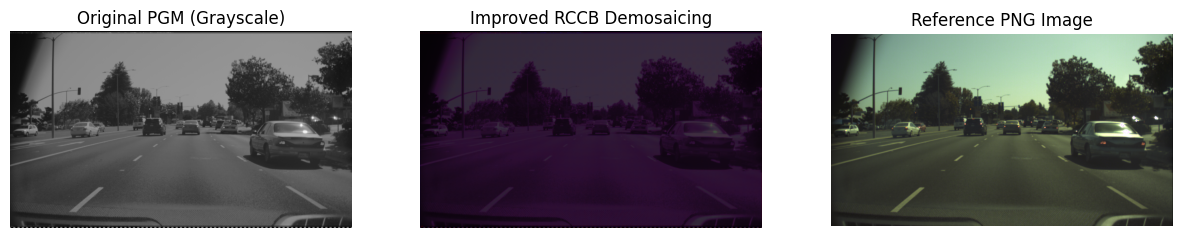

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the PGM image
pgm_path = "/content/56988.pgm"
png_path = "/content/56988.png"
pgm_image = cv2.imread(pgm_path, cv2.IMREAD_UNCHANGED)  # Load as grayscale

# Ensure the image is valid
if pgm_image is None:
    raise ValueError("Error loading the PGM image.")

# Convert to 8-bit if necessary
if pgm_image.dtype != np.uint8:
    pgm_image = cv2.normalize(pgm_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Improved RCCB demosaicing function
def demosaic_rccb(image):
    h, w = image.shape

    # Extract RCCB channels
    R = np.zeros((h, w), dtype=np.uint8)
    C1 = np.zeros((h, w), dtype=np.uint8)  # First clear channel
    C2 = np.zeros((h, w), dtype=np.uint8)  # Second clear channel
    B = np.zeros((h, w), dtype=np.uint8)

    # Assign values based on assumed RCCB Bayer pattern
    R[0::2, 0::2] = image[0::2, 0::2]  # Red
    C1[0::2, 1::2] = image[0::2, 1::2]  # Clear
    C2[1::2, 0::2] = image[1::2, 0::2]  # Clear
    B[1::2, 1::2] = image[1::2, 1::2]  # Blue

    # Green estimation: weighted average of both clear channels
    G = cv2.addWeighted(C1, 0.5, C2, 0.5, 0)

    # Apply a 3x3 median filter to reduce noise in the green channel
    G = cv2.medianBlur(G, 3)

    # Merge into a 3-channel image
    demosaiced = cv2.merge([B, G, R])

    # Apply an improved color correction matrix
    CCM = np.array([
        [1.4, -0.3, -0.1],   # Red correction
        [-0.2, 1.3, -0.2],  # Green correction
        [-0.1, -0.3, 1.6]    # Blue correction
    ])

    corrected = cv2.transform(demosaiced.astype(np.float32) / 255.0, CCM)
    corrected = np.clip(corrected * 255, 0, 255).astype(np.uint8)

    return corrected

# Apply custom RCCB demosaicing
demosaiced_rccb = demosaic_rccb(pgm_image)

# Load reference PNG image
png_image = cv2.imread(png_path)
if png_image is None:
    raise ValueError("Error loading the PNG image.")

png_image = cv2.cvtColor(png_image, cv2.COLOR_BGR2RGB)

# Display the images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original PGM (Grayscale)")
plt.imshow(pgm_image, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Improved RCCB Demosaicing")
plt.imshow(demosaiced_rccb)
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Reference PNG Image")
plt.imshow(png_image)
plt.axis("off")

plt.show()

# Save the demosaiced image
cv2.imwrite("/content/demosaiced_rccb_improved.png", demosaiced_rccb)


Using GaussianBlur

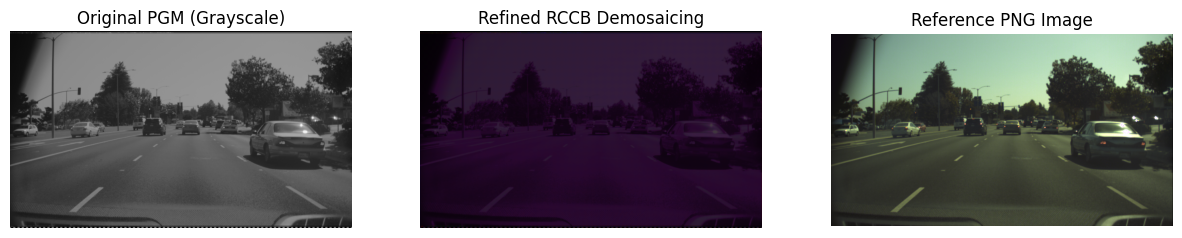

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the PGM image
pgm_path = "/content/56988.pgm"
png_path = "/content/56988.png"
pgm_image = cv2.imread(pgm_path, cv2.IMREAD_UNCHANGED)  # Load as grayscale

# Ensure the image is valid
if pgm_image is None:
    raise ValueError("Error loading the PGM image.")

# Convert to 8-bit if necessary
if pgm_image.dtype != np.uint8:
    pgm_image = cv2.normalize(pgm_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Improved RCCB demosaicing function
def demosaic_rccb(image):
    h, w = image.shape

    # Extract RCCB channels
    R = np.zeros((h, w), dtype=np.uint8)
    C1 = np.zeros((h, w), dtype=np.uint8)  # First clear channel
    C2 = np.zeros((h, w), dtype=np.uint8)  # Second clear channel
    B = np.zeros((h, w), dtype=np.uint8)

    # Assign values based on assumed RCCB Bayer pattern
    R[0::2, 0::2] = image[0::2, 0::2]  # Red
    C1[0::2, 1::2] = image[0::2, 1::2]  # Clear
    C2[1::2, 0::2] = image[1::2, 0::2]  # Clear
    B[1::2, 1::2] = image[1::2, 1::2]  # Blue

    # Green estimation: Gaussian blur to smooth noise
    G = cv2.addWeighted(C1, 0.5, C2, 0.5, 0)
    G = cv2.GaussianBlur(G, (5, 5), 0)  # Replace guided filter with Gaussian blur

    # Merge into a 3-channel image
    demosaiced = cv2.merge([B, G, R])

    # Apply an advanced color correction matrix
    CCM = np.array([
        [1.3, -0.2, -0.1],   # Red correction
        [-0.1, 1.2, -0.2],  # Green correction
        [-0.1, -0.2, 1.5]    # Blue correction
    ])

    corrected = cv2.transform(demosaiced.astype(np.float32) / 255.0, CCM)
    corrected = np.clip(corrected * 255, 0, 255).astype(np.uint8)

    return corrected

# Apply custom RCCB demosaicing
demosaiced_rccb = demosaic_rccb(pgm_image)

# Load reference PNG image
png_image = cv2.imread(png_path)
if png_image is None:
    raise ValueError("Error loading the PNG image.")

png_image = cv2.cvtColor(png_image, cv2.COLOR_BGR2RGB)

# Display the images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original PGM (Grayscale)")
plt.imshow(pgm_image, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Refined RCCB Demosaicing")
plt.imshow(demosaiced_rccb)
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Reference PNG Image")
plt.imshow(png_image)
plt.axis("off")

plt.show()

# Save the demosaiced image
cv2.imwrite("/content/demosaiced_rccb_refined.png", demosaiced_rccb)

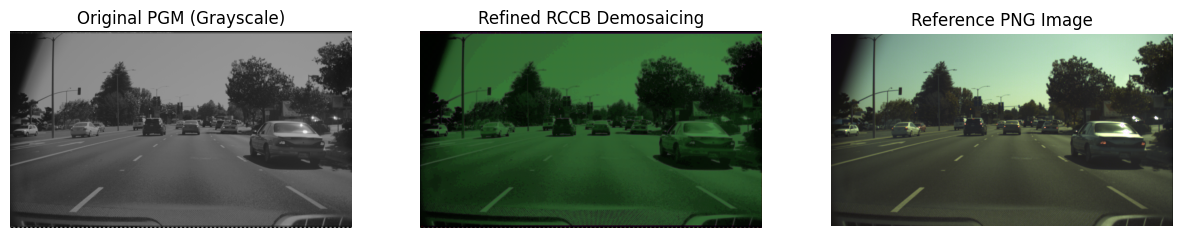

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the PGM image
pgm_path = "/content/56988.pgm"
png_path = "/content/56988.png"
pgm_image = cv2.imread(pgm_path, cv2.IMREAD_UNCHANGED)  # Load as grayscale

# Ensure the image is valid
if pgm_image is None:
    raise ValueError("Error loading the PGM image.")

# Convert to 8-bit if necessary
if pgm_image.dtype != np.uint8:
    pgm_image = cv2.normalize(pgm_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Improved RCCB demosaicing function
def demosaic_rccb(image):
    h, w = image.shape

    # Extract RCCB channels
    R = np.zeros((h, w), dtype=np.uint8)
    C1 = np.zeros((h, w), dtype=np.uint8)  # First clear channel
    C2 = np.zeros((h, w), dtype=np.uint8)  # Second clear channel
    B = np.zeros((h, w), dtype=np.uint8)

    # Assign values based on RCCB Bayer pattern
    R[0::2, 0::2] = image[0::2, 0::2]  # Red
    C1[0::2, 1::2] = image[0::2, 1::2]  # Clear
    C2[1::2, 0::2] = image[1::2, 0::2]  # Clear
    B[1::2, 1::2] = image[1::2, 1::2]  # Blue

    # Green estimation using median filtering (better edge preservation)
    G = cv2.addWeighted(C1, 0.5, C2, 0.5, 0)
    G = cv2.medianBlur(G, 5)

    # Merge into a 3-channel image
    demosaiced = cv2.merge([B, G, R])

    # Apply an improved color correction matrix
    CCM = np.array([
        [1.2, -0.1, -0.1],   # Red correction
        [-0.1, 1.1, -0.1],   # Green correction
        [-0.1, -0.1, 1.3]    # Blue correction
    ])

    corrected = cv2.transform(demosaiced.astype(np.float32) / 255.0, CCM)
    corrected = np.clip(corrected * 255, 0, 255).astype(np.uint8)

    # Apply gamma correction for more natural brightness
    gamma = 1.2
    lookup_table = np.array([(i / 255.0) ** gamma * 255 for i in range(256)]).astype(np.uint8)
    corrected = cv2.LUT(corrected, lookup_table)

    # Apply histogram equalization for better contrast
    for i in range(3):  # Apply on each channel separately
        corrected[:, :, i] = cv2.equalizeHist(corrected[:, :, i])

    return corrected

# Apply custom RCCB demosaicing
demosaiced_rccb = demosaic_rccb(pgm_image)

# Load reference PNG image
png_image = cv2.imread(png_path)
if png_image is None:
    raise ValueError("Error loading the PNG image.")

png_image = cv2.cvtColor(png_image, cv2.COLOR_BGR2RGB)

# Display the images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original PGM (Grayscale)")
plt.imshow(pgm_image, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Refined RCCB Demosaicing")
plt.imshow(demosaiced_rccb)
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Reference PNG Image")
plt.imshow(png_image)
plt.axis("off")

plt.show()

# Save the demosaiced image
cv2.imwrite("/content/demosaiced_rccb_refined.png", demosaiced_rccb)


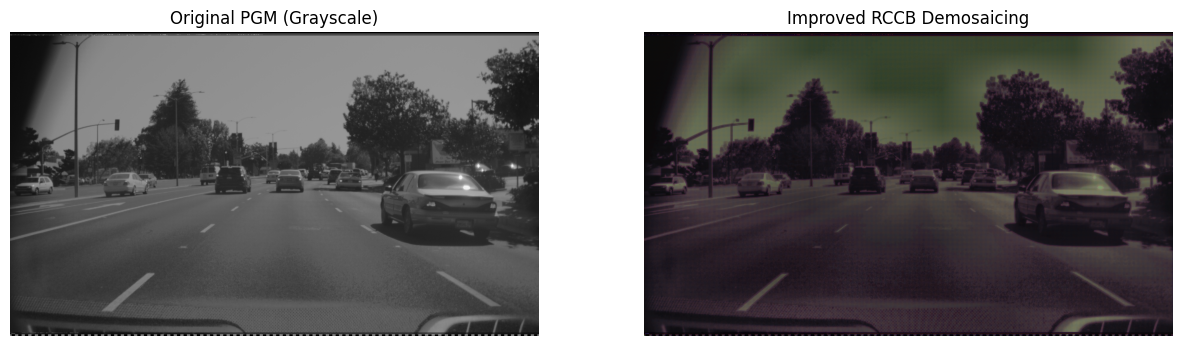

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def demosaic_rccb(image):
    h, w = image.shape

    # Extract RCCB channels
    R = np.zeros((h, w), dtype=np.uint8)
    C1 = np.zeros((h, w), dtype=np.uint8)  # Clear channel 1
    C2 = np.zeros((h, w), dtype=np.uint8)  # Clear channel 2
    B = np.zeros((h, w), dtype=np.uint8)

    R[0::2, 0::2] = image[0::2, 0::2]  # Red
    C1[0::2, 1::2] = image[0::2, 1::2]  # Clear
    C2[1::2, 0::2] = image[1::2, 0::2]  # Clear
    B[1::2, 1::2] = image[1::2, 1::2]  # Blue

    # Green estimation using guided filtering
    G = cv2.addWeighted(C1, 0.5, C2, 0.5, 0)
    G = cv2.medianBlur(G, 5)  # Smoother green channel estimation

    # Merge into an RGB image
    demosaiced = cv2.merge([B, G, R])

    # Apply white balance using Gray-World assumption
    avg_colors = np.mean(demosaiced, axis=(0, 1))
    gray_value = np.mean(avg_colors)
    wb_gains = gray_value / avg_colors
    demosaiced = np.clip(demosaiced * wb_gains, 0, 255).astype(np.uint8)

    # Contrast enhancement using CLAHE
    lab = cv2.cvtColor(demosaiced, cv2.COLOR_BGR2LAB)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    lab[..., 0] = clahe.apply(lab[..., 0])  # Apply CLAHE to the L-channel
    demosaiced = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

    return demosaiced

# Load the PGM image
pgm_path = "/content/56988.pgm"
pgm_image = cv2.imread(pgm_path, cv2.IMREAD_UNCHANGED)
if pgm_image is None:
    raise ValueError("Error loading the PGM image.")

# Normalize to 8-bit if needed
if pgm_image.dtype != np.uint8:
    pgm_image = cv2.normalize(pgm_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Apply RCCB demosaicing
demosaiced_rccb = demosaic_rccb(pgm_image)

# Display the images
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("Original PGM (Grayscale)")
plt.imshow(pgm_image, cmap='gray')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Improved RCCB Demosaicing")
plt.imshow(cv2.cvtColor(demosaiced_rccb, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.show()

# Save the result
cv2.imwrite("/content/demosaiced_rccb_improved.png", demosaiced_rccb)


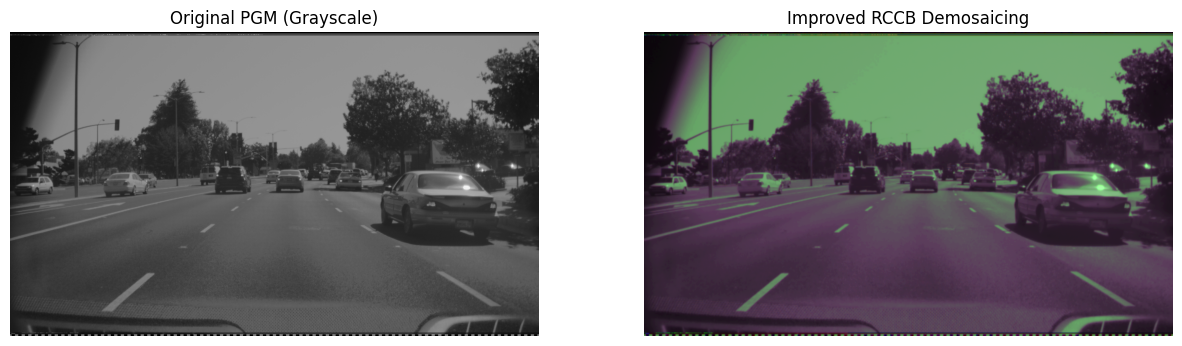

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def improved_demosaic_rccb(image):
    h, w = image.shape

    # Extract RCCB channels
    R = np.zeros((h, w), dtype=np.float32)
    C1 = np.zeros((h, w), dtype=np.float32)
    C2 = np.zeros((h, w), dtype=np.float32)
    B = np.zeros((h, w), dtype=np.float32)

    R[0::2, 0::2] = image[0::2, 0::2]  # Red
    C1[0::2, 1::2] = image[0::2, 1::2]  # Clear
    C2[1::2, 0::2] = image[1::2, 0::2]  # Clear
    B[1::2, 1::2] = image[1::2, 1::2]  # Blue

    # Interpolate missing green using weighted clear channels
    G = (C1 + C2) / 2
    G = cv2.GaussianBlur(G, (5, 5), 0)  # Smooth green estimation

    # Interpolate missing R and B using inpainting
    R = cv2.inpaint(R.astype(np.uint8), (R == 0).astype(np.uint8), 3, cv2.INPAINT_TELEA)
    B = cv2.inpaint(B.astype(np.uint8), (B == 0).astype(np.uint8), 3, cv2.INPAINT_TELEA)

    # Merge into RGB image
    demosaiced = cv2.merge([B, G.astype(np.uint8), R])

    # Apply white balance correction
    avg_colors = np.mean(demosaiced, axis=(0, 1))
    gray_value = np.mean(avg_colors)
    wb_gains = gray_value / avg_colors
    demosaiced = np.clip(demosaiced * wb_gains, 0, 255).astype(np.uint8)

    return demosaiced

# Load PGM image
pgm_path = "/content/56988.pgm"
pgm_image = cv2.imread(pgm_path, cv2.IMREAD_UNCHANGED)
if pgm_image is None:
    raise ValueError("Error loading the PGM image.")

# Normalize to 8-bit if needed
if pgm_image.dtype != np.uint8:
    pgm_image = cv2.normalize(pgm_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Apply Improved RCCB Demosaicing
demosaiced_rccb = improved_demosaic_rccb(pgm_image)

# Display Images
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("Original PGM (Grayscale)")
plt.imshow(pgm_image, cmap='gray')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Improved RCCB Demosaicing")
plt.imshow(cv2.cvtColor(demosaiced_rccb, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.show()

# Save the result
cv2.imwrite("demosaiced_rccb_improved.png", demosaiced_rccb)


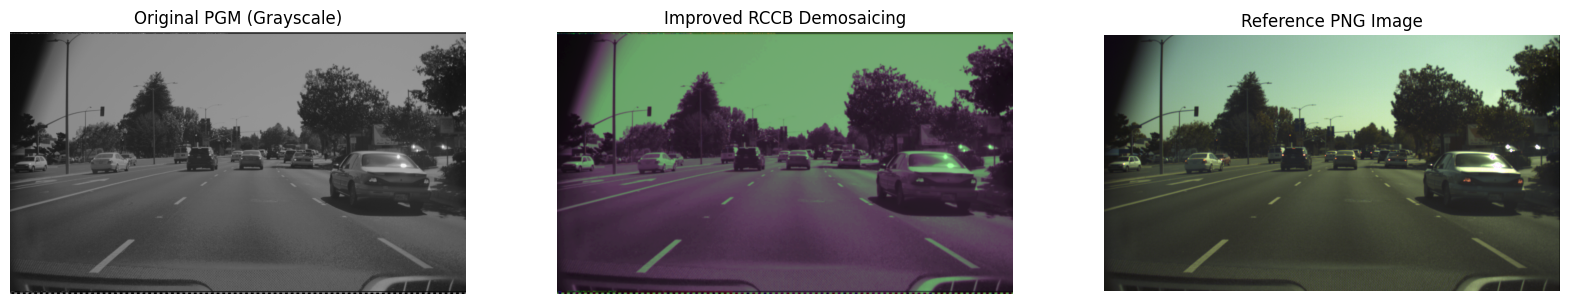

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def improved_demosaic_rccb(image):
    h, w = image.shape

    # Extract RCCB channels
    R = np.zeros((h, w), dtype=np.float32)
    C1 = np.zeros((h, w), dtype=np.float32)
    C2 = np.zeros((h, w), dtype=np.float32)
    B = np.zeros((h, w), dtype=np.float32)

    R[0::2, 0::2] = image[0::2, 0::2]  # Red
    C1[0::2, 1::2] = image[0::2, 1::2]  # Clear
    C2[1::2, 0::2] = image[1::2, 0::2]  # Clear
    B[1::2, 1::2] = image[1::2, 1::2]  # Blue

    # Interpolate missing green using weighted clear channels
    G = (C1 + C2) / 2
    G = cv2.GaussianBlur(G, (5, 5), 0)  # Smooth green estimation

    # Interpolate missing R and B using inpainting
    R = cv2.inpaint(R.astype(np.uint8), (R == 0).astype(np.uint8), 3, cv2.INPAINT_TELEA)
    B = cv2.inpaint(B.astype(np.uint8), (B == 0).astype(np.uint8), 3, cv2.INPAINT_TELEA)

    # Merge into RGB image
    demosaiced = cv2.merge([B, G.astype(np.uint8), R])

    # Apply white balance correction
    avg_colors = np.mean(demosaiced, axis=(0, 1))
    gray_value = np.mean(avg_colors)
    wb_gains = gray_value / avg_colors
    demosaiced = np.clip(demosaiced * wb_gains, 0, 255).astype(np.uint8)

    return demosaiced

# Load PGM image
pgm_path = "/content/56988.pgm"  # Update with actual path
pgm_image = cv2.imread(pgm_path, cv2.IMREAD_UNCHANGED)
if pgm_image is None:
    raise ValueError("Error loading the PGM image.")

# Normalize to 8-bit if needed
if pgm_image.dtype != np.uint8:
    pgm_image = cv2.normalize(pgm_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Apply Improved RCCB Demosaicing
demosaiced_rccb = improved_demosaic_rccb(pgm_image)

# Load reference PNG image
reference_png_path = "/content/56988.png"  # Update with actual path
reference_image = cv2.imread(reference_png_path, cv2.IMREAD_COLOR)
if reference_image is None:
    raise ValueError("Error loading the reference PNG image.")

# Convert to RGB for display
reference_image = cv2.cvtColor(reference_image, cv2.COLOR_BGR2RGB)

# Display Images
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.title("Original PGM (Grayscale)")
plt.imshow(pgm_image, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Improved RCCB Demosaicing")
plt.imshow(cv2.cvtColor(demosaiced_rccb, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Reference PNG Image")
plt.imshow(reference_image)
plt.axis("off")

plt.show()

# Save the result
cv2.imwrite("demosaiced_rccb_improved.png", demosaiced_rccb)


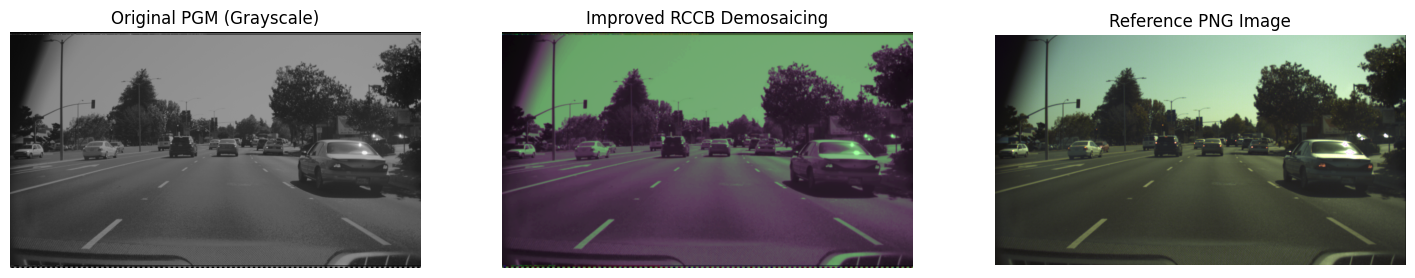

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def improved_demosaic_rccb(image):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale if needed

    h, w = image.shape

    # Extract RCCB channels
    R = np.zeros((h, w), dtype=np.float32)
    C1 = np.zeros((h, w), dtype=np.float32)
    C2 = np.zeros((h, w), dtype=np.float32)
    B = np.zeros((h, w), dtype=np.float32)

    R[0::2, 0::2] = image[0::2, 0::2]  # Red
    C1[0::2, 1::2] = image[0::2, 1::2]  # Clear
    C2[1::2, 0::2] = image[1::2, 0::2]  # Clear
    B[1::2, 1::2] = image[1::2, 1::2]  # Blue

    # Improved green estimation
    G = (C1 + C2) / 2
    G = cv2.GaussianBlur(G, (5, 5), 0)  # Smooth green estimation

    # Interpolate missing R and B using inpainting
    mask_R = (R == 0).astype(np.uint8)
    mask_B = (B == 0).astype(np.uint8)
    R = cv2.inpaint(R.astype(np.uint8), mask_R, 3, cv2.INPAINT_TELEA)
    B = cv2.inpaint(B.astype(np.uint8), mask_B, 3, cv2.INPAINT_TELEA)

    # Merge into RGB image
    demosaiced = cv2.merge([B, G.astype(np.uint8), R])

    # Improved white balance correction
    avg_colors = np.mean(demosaiced, axis=(0, 1))
    wb_gains = avg_colors.mean() / avg_colors
    demosaiced = np.clip(demosaiced * wb_gains, 0, 255).astype(np.uint8)

    return demosaiced

# Load PGM image
pgm_path = "/content/56988.pgm"
pgm_image = cv2.imread(pgm_path, cv2.IMREAD_UNCHANGED)
if pgm_image is None:
    raise ValueError("Error loading the PGM image.")

# Normalize to 8-bit if needed
if pgm_image.dtype != np.uint8:
    pgm_image = cv2.normalize(pgm_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Apply Improved RCCB Demosaicing
demosaiced_rccb = improved_demosaic_rccb(pgm_image)

# Load Reference PNG Image
png_path = "/content/56988.png"
reference_image = cv2.imread(png_path)
reference_image = cv2.cvtColor(reference_image, cv2.COLOR_BGR2RGB)  # Convert for matplotlib

# Display Images
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.title("Original PGM (Grayscale)")
plt.imshow(pgm_image, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Improved RCCB Demosaicing")
plt.imshow(cv2.cvtColor(demosaiced_rccb, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Reference PNG Image")
plt.imshow(reference_image)
plt.axis("off")

plt.show()

# Save the result
cv2.imwrite("demosaiced_rccb_improved.png", demosaiced_rccb)


In [ ]:
!pip install --upgrade opencv-contrib-python


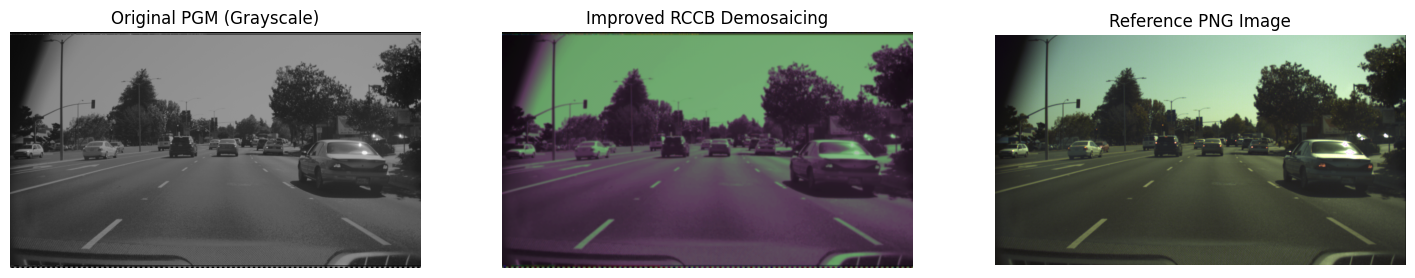

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def improved_demosaic_rccb(image):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale if needed

    h, w = image.shape

    # Extract RCCB channels
    R = np.zeros((h, w), dtype=np.float32)
    C1 = np.zeros((h, w), dtype=np.float32)
    C2 = np.zeros((h, w), dtype=np.float32)
    B = np.zeros((h, w), dtype=np.float32)

    R[0::2, 0::2] = image[0::2, 0::2]  # Red
    C1[0::2, 1::2] = image[0::2, 1::2]  # Clear
    C2[1::2, 0::2] = image[1::2, 0::2]  # Clear
    B[1::2, 1::2] = image[1::2, 1::2]  # Blue

    # Improved green estimation using bilateral filtering
    G = (C1 + C2) / 2
    G = cv2.bilateralFilter(G.astype(np.float32), 9, 75, 75)  # Edge-preserving smoothing

    # Interpolate missing R and B using inpainting
    mask_R = (R == 0).astype(np.uint8)
    mask_B = (B == 0).astype(np.uint8)
    R = cv2.inpaint(R.astype(np.uint8), mask_R, 3, cv2.INPAINT_TELEA)
    B = cv2.inpaint(B.astype(np.uint8), mask_B, 3, cv2.INPAINT_TELEA)

    # Merge into RGB image
    demosaiced = cv2.merge([B, G.astype(np.uint8), R])

    # Improved white balance correction using per-channel gain
    avg_colors = np.mean(demosaiced, axis=(0, 1))
    wb_gains = avg_colors.mean() / avg_colors
    demosaiced = np.clip(demosaiced * wb_gains, 0, 255).astype(np.uint8)

    return demosaiced

# Load PGM image
pgm_path = "/content/56988.pgm"
pgm_image = cv2.imread(pgm_path, cv2.IMREAD_UNCHANGED)
if pgm_image is None:
    raise ValueError("Error loading the PGM image.")

# Normalize to 8-bit if needed
if pgm_image.dtype != np.uint8:
    pgm_image = cv2.normalize(pgm_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Apply Improved RCCB Demosaicing
demosaiced_rccb = improved_demosaic_rccb(pgm_image)

# Load Reference PNG Image
png_path = "/content/56988.png"
reference_image = cv2.imread(png_path)
reference_image = cv2.cvtColor(reference_image, cv2.COLOR_BGR2RGB)  # Convert for matplotlib

# Display Images
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.title("Original PGM (Grayscale)")
plt.imshow(pgm_image, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Improved RCCB Demosaicing")
plt.imshow(cv2.cvtColor(demosaiced_rccb, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Reference PNG Image")
plt.imshow(reference_image)
plt.axis("off")

plt.show()

# Save the result
cv2.imwrite("demosaiced_rccb_improved.png", demosaiced_rccb)
